In [3]:
import numpy as np
from matplotlib import pyplot as plt
import nsmod
import os 
from numpy import cos, sin
%matplotlib inline

from nsmod.one_component_model_with_Euler import main
from nsmod import Plot, File_Functions, Physics_Functions

In [33]:
def SignalModel_EM3(theta1, t):
    omega0, epsI, a0, chi, epsA = theta1
    
    c = 3e10
    R = 1e6
    k = 2/3.0 * R/c * epsA
    
    omega = 1/np.sqrt(2*k*t + 1/omega0**2)
    
    psi = np.pi/2 - epsI*omega*t #+ .5*k*epsI*omega**3*t**2
    psidot = - epsI*omega #+ k*epsI*omega**3*t
    
    Sin2Theta = 1 - (sin(a0)*sin(psi)*sin(chi) + cos(a0)*cos(chi))**2
    Phidot = omega #- psidot * sin(chi) * (cos(a0) *sin(chi) - sin(psi) * sin(a0) * cos(chi)) / (
                   #     (sin(a0)*cos(chi) - cos(a0)*sin(psi)*sin(chi))**2 + (cos(psi) * sin(chi))**2)
    
    

    return  -k * Phidot**3 * Sin2Theta / (2*np.pi)

BETA FUNCTION IS USED
AnomTorque : 1.0000000000e+00
Bs : 1.8973665961e+15
DeltaPhi_49 : 1.7228233961e-03
DeltaPhi_49_SpindownTorque : 1.0715989444e-05
DeltaPhi_63 : 2.4028605622e-03
DeltaPhi_75 : 1.7327090537e-03
EMtorqueAmplificationfactor : 4.3816499746e+00
P : 2.0010144290e-02
T : 6.6000000000e+02
a0 : 4.0000000000e+00
beta : -1.3856032193e-02
chi0 : 8.8600000000e+01
delta_omega_dot0_FP : 1.6822421184e-06
delta_omega_dot0_FP_EM : 2.3462609409e-06
epsA : 1.0000000000e-06
epsI1 : 0.0000000000e+00
epsI3 : 1.0000000000e-04
n : 1.0000000000e+05
nu_dot0 : -1.0943021203e-04
omega0 : 3.1400000000e+02
omega_dot0 : -6.8757030038e-04
source_script : one-component-model-with-Euler
tauA : 2.0010144290e+04
tauE : 4.5668057481e+05
tauP : 2.0010144290e+02
tauS : 4.5640796787e+05
wobble_angle : 7.0493474014e-02
wobble_angle_spindown : 4.3847055077e-04
BETA FUNCTION IS USED
BETA FUNCTION IS USED


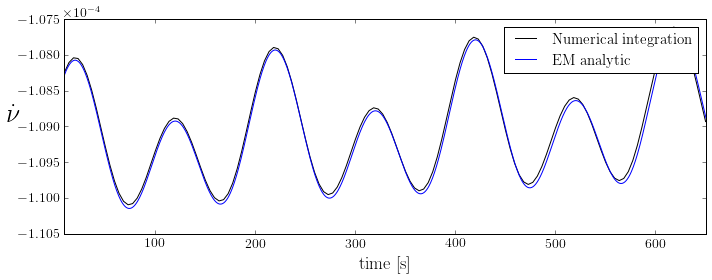

In [34]:
fig, ax1 = plt.subplots(figsize=(10, 4))

# Parameter3
epsI3 = 1e-4
omega0 = 2*np.pi*50
epsA = 1e-6
chi0 = 88.6
tauP = 2 * np.pi/abs(epsI3 * omega0)
T = 3.3* tauP
a0 = 4.0

n = 100000
error = 1e-13

# Exact numerical result
file_name = main(chi0=chi0, epsI3=epsI3, epsA=epsA, omega0=omega0, T=T, 
                 n=n, error=error, a0=a0, 
                 #cleanup=True, 
                 #DryRun=True, 
                 AnomTorque=True)

File_Functions.PrintParameterDictionary(file_name)

ax1 = Plot.SpindownRate(file_name, ax=ax1, analytic="", divisor=11, label="Numerical integration")

time = np.linspace(0, T, 1000)

PD = File_Functions.Parameter_Dictionary(file_name)
nu_dot0 = PD['nu_dot0']

# EM model
theta_EM = np.array([omega0, epsI3, np.radians(a0), np.radians(chi0), epsA])
ax1.plot(time, SignalModel_EM2(theta_EM, time), color="b", label="EM analytic")

#ax1.set_title("EM amplification factor = {:2.4f}".format(PD['EMtorqueAmplificationfactor']))
plt.tight_layout()
plt.legend()
#plt.savefig("fig1.pdf")
plt.show()


BETA FUNCTION IS USED


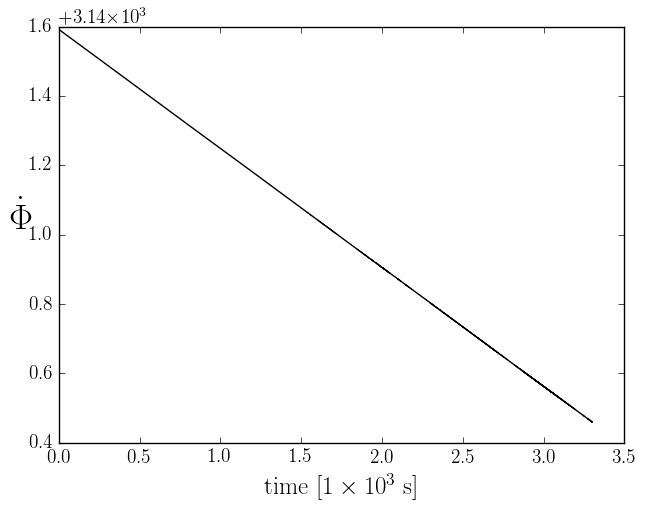

In [26]:
Plot.big_phi_dot(file_name)
plt.show()

BETA FUNCTION IS USED


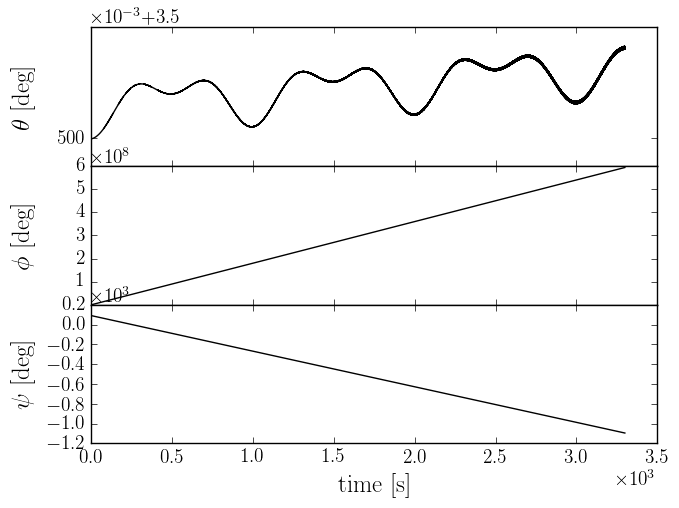

In [27]:
Plot.Euler_Angles(file_name)
plt.show()

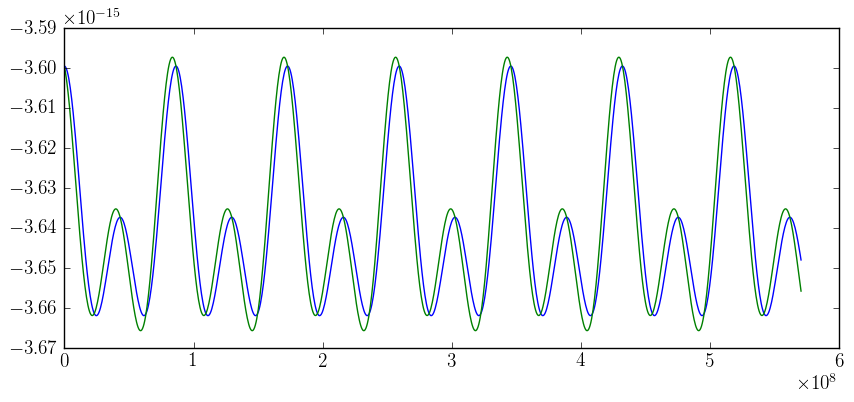

BETA FUNCTION IS USED
AnomTorque : 1.0000000000e+00
Bs : 9.9859901863e+11
DeltaPhi_49 : 4.0991347572e-02
DeltaPhi_49_SpindownTorque : -3.1239050432e-09
DeltaPhi_63 : 3.5539894813e-01
DeltaPhi_75 : 6.0976802654e+00
EMtorqueAmplificationfactor : 2.7237912161e+01
P : 4.0536679401e-01
T : 2.8500000000e+08
a0 : 6.1000000000e+00
beta : -8.9999917341e+01
chi0 : 8.8600000000e+01
delta_omega_dot0_FP : 1.3750172025e-17
delta_omega_dot0_FP_EM : 1.1921532137e-16
epsA : 2.7700000000e-13
epsI1 : 0.0000000000e+00
epsI3 : -4.6900000000e-09
n : 1.0000000000e+05
nu_dot0 : -3.6460545336e-15
omega0 : 1.5500000000e+01
omega_dot0 : -2.2908836274e-14
source_script : one-component-model-with-Euler
tauA : 1.4634180289e+12
tauE : 6.7659482194e+14
tauP : 8.6432152241e+07
tauS : 6.7619094130e+14
wobble_angle : 1.6772598407e+00
wobble_angle_spindown : -1.2782210846e-07


In [35]:
def SignalModel_EM2(theta1, t):
    omega0, epsI, a0, chi, epsA = theta1
    
    c = 3e10
    R = 1e6
    k = 2/3.0 * R/c * epsA
    
    omega = 1/np.sqrt(2*k*t + 1/omega0**2)
    
    psi = np.pi/2 - epsI*omega*t #+ .5*k*epsI*omega**3*t**2
    psidot = - epsI*omega #+ k*epsI*omega**3*t
    
    Sin2Theta = 1 - (sin(a0)*sin(psi)*sin(chi) + cos(a0)*cos(chi))**2
    Phidot = omega - psidot * sin(chi) * (cos(a0) *sin(chi) - sin(psi) * sin(a0) * cos(chi)) / (
                        (sin(a0)*cos(chi) - cos(a0)*sin(psi)*sin(chi))**2 + (cos(psi) * sin(chi))**2)
    
    T1 = -k * Phidot**3 * Sin2Theta / (2*np.pi)
    
    theta = a0
    GEOMETRIC = psidot**2 * ((2*sin(chi)**3*sin(psi)*sin(theta)*cos(theta) - 
                              sin(chi)**2*sin(psi)**2*sin(theta)**2*cos(chi) - 
                              2*sin(chi)**2*sin(theta)**2*cos(chi) + 
                              sin(chi)**2*cos(chi) - sin(theta)**2*cos(chi)**3
                             )*sin(chi)*sin(theta)*cos(psi)/(
                            (sin(chi)*sin(psi)*cos(theta) - sin(theta)*cos(chi))**2 + 
                             sin(chi)**2*cos(psi)**2)**2
                            )/ (2*np.pi)

    return T1 + GEOMETRIC



fig, ax1 = plt.subplots(figsize=(10, 4))

# Parameters
epsI3 = -0.5 * 9.37e-9
omega0 = 2*np.pi*2.47
epsA = 2.77e-13
chi0 = 88.6
tauP = 2 * np.pi/abs(epsI3 * omega0)
T = 3.3* tauP
a0 = 6.1

n = 100000
error = 1e-13

time = np.linspace(0, 2*T, 1000)

# EM model
theta_EM = np.array([omega0, epsI3, np.radians(a0), np.radians(chi0), epsA])
ax1.plot(time, SignalModel_EM3(theta_EM, time), color="b", label="EM analytic")

#
theta_EM = np.array([omega0, epsI3, np.radians(a0), np.radians(chi0), epsA])
ax1.plot(time, SignalModel_EM2(theta_EM, time), color="g", label="EM analytic")

plt.savefig("fig1.pdf")
plt.show()

file_name = main(chi0=chi0, epsI3=epsI3, epsA=epsA, omega0=omega0, T=T, 
                 n=n, error=error, a0=a0, 
                 #cleanup=True, 
                 DryRun=True, 
                 AnomTorque=True)


File_Functions.PrintParameterDictionary(file_name)

## Messing about

BETA FUNCTION IS USED
BETA FUNCTION IS USED


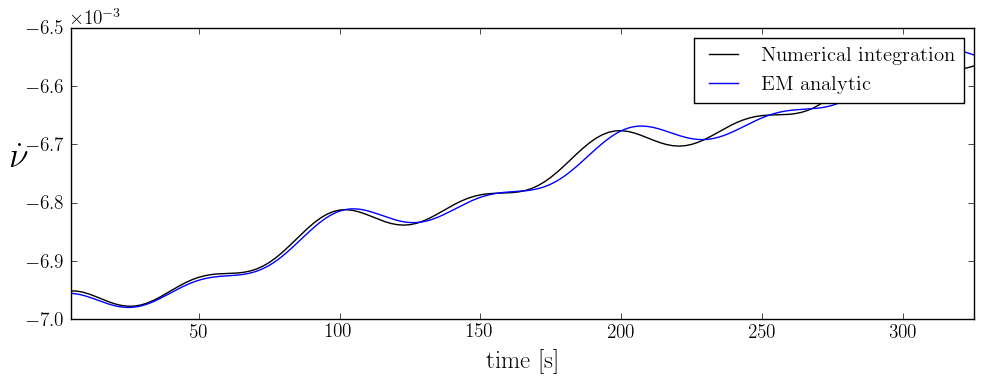

BETA FUNCTION IS USED
AnomTorque : 1.0000000000e+00
Bs : 5.3665631460e+15
DeltaPhi_49 : 1.9218738103e-03
DeltaPhi_49_SpindownTorque : 1.7145583110e-04
DeltaPhi_63 : 4.2887690471e-02
DeltaPhi_75 : 3.4499582764e-02
EMtorqueAmplificationfactor : 7.0106399594e+01
P : 1.0005072145e-02
T : 3.3000000000e+02
a0 : 4.0000000000e+00
beta : -1.0367114666e-01
chi0 : 8.8600000000e+01
delta_omega_dot0_FP : 6.7289684737e-06
delta_omega_dot0_FP_EM : 1.5016070022e-04
epsA : 8.0000000000e-06
epsI1 : 0.0000000000e+00
epsI3 : 1.0000000000e-04
n : 1.0000000000e+05
nu_dot0 : -7.0035335698e-03
omega0 : 6.2800000000e+02
omega_dot0 : -4.4004499224e-02
source_script : one-component-model-with-Euler
tauA : 1.2506340181e+03
tauE : 1.4271267963e+04
tauP : 1.0005072145e+02
tauS : 1.4262748996e+04
wobble_angle : 7.8638101741e-02
wobble_angle_spindown : 7.0155288123e-03


In [82]:
fig, ax1 = plt.subplots(figsize=(10, 4))

# Parameters
epsI3 = 1e-4
omega0 = 2*np.pi*100
epsA = 8e-6
chi0 = 88.6
tauP = 2 * np.pi/abs(epsI3 * omega0)
T = 3.3* tauP
a0 = 4.0

n = 100000
error = 1e-12

# Exact numerical result
file_name = main(chi0=chi0, epsI3=epsI3, epsA=epsA, omega0=omega0, T=T, 
                 n=n, error=error, a0=a0, 
                 #cleanup=True, 
                 #DryRun=True, 
                 AnomTorque=True)



ax1 = Plot.SpindownRate(file_name, ax=ax1, analytic="", divisor=11, label="Numerical integration")

time = np.linspace(0, T, 1000)

PD = File_Functions.Parameter_Dictionary(file_name)
nu_dot0 = PD['nu_dot0']

# EM model
theta_EM = np.array([omega0, epsI3, np.radians(a0), np.radians(chi0), epsA])
ax1.plot(time, SignalModel_EM3(theta_EM, time), color="b", label="EM analytic")

#ax1.set_title("EM amplification factor = {:2.4f}".format(PD['EMtorqueAmplificationfactor']))
plt.tight_layout()
plt.legend()
plt.savefig("fig1.pdf")
plt.show()

File_Functions.PrintParameterDictionary(file_name)